###1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [4]:
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Check for null values in the dataset
null_values_summary = spotify_data.isnull().sum()

# Check for duplicate rows in the dataset
duplicate_rows_count = spotify_data.duplicated().sum()

# Output the findings
null_values_summary, duplicate_rows_count

# Remove duplicate rows
spotify_data_cleaned = spotify_data.drop_duplicates()

# Verify the number of rows after removing duplicates
rows_before = len(spotify_data)
rows_after = len(spotify_data_cleaned)

rows_before, rows_after

(440, 413)

###2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

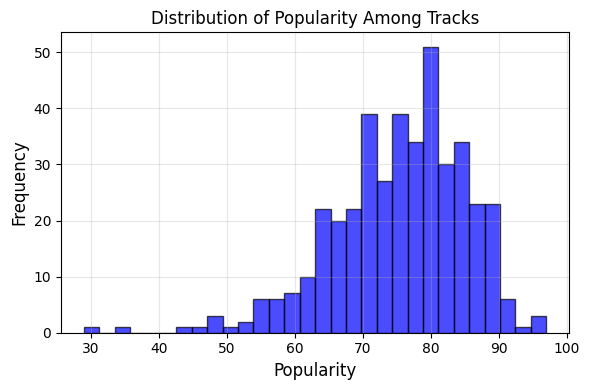

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Ensure the 'Popularity' column is numeric for the visualization
spotify_data_cleaned['Popularity'] = pd.to_numeric(spotify_data_cleaned['Popularity'], errors='coerce')

# Plot the distribution of track popularity
plt.figure(figsize=(6, 4))
plt.hist(spotify_data_cleaned['Popularity'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Popularity Among Tracks', fontsize=12)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


###3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

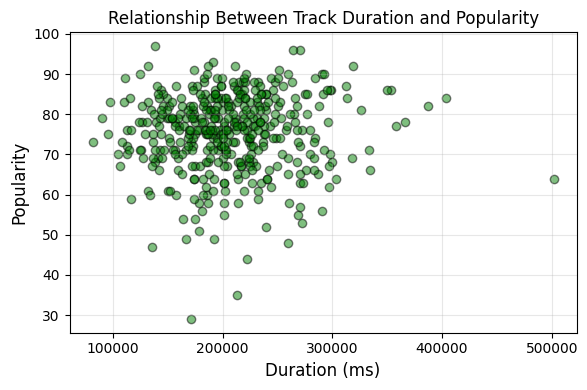

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Ensure both 'Popularity' and 'Duration (ms)' columns are numeric for the analysis
spotify_data_cleaned['Duration (ms)'] = pd.to_numeric(spotify_data_cleaned['Duration (ms)'], errors='coerce')

# Plot a scatter plot to explore the relationship between popularity and duration of tracks
plt.figure(figsize=(6, 4))
plt.scatter(spotify_data_cleaned['Duration (ms)'], spotify_data_cleaned['Popularity'], alpha=0.5, color='green', edgecolor='k')
plt.title('Relationship Between Track Duration and Popularity', fontsize=12)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


###4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

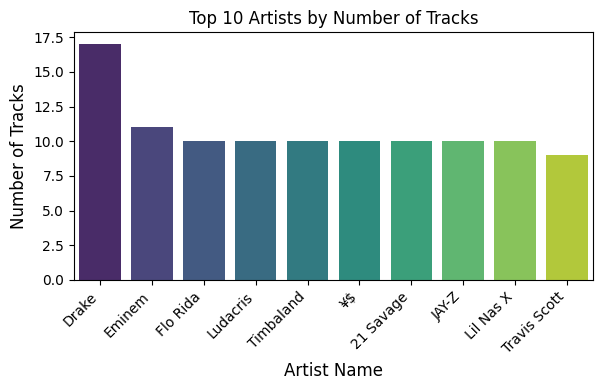

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Count the number of tracks for each artist using the "Artist" column
artist_track_counts = spotify_data_cleaned['Artist'].value_counts()

# Get the top 10 artists with the highest number of tracks
top_10_artists = artist_track_counts.head(10)

# Plot a countplot for the top 10 artists
plt.figure(figsize=(6, 4))
sns.barplot(x=top_10_artists.index, y=top_10_artists.values, hue=top_10_artists.index, dodge=False, legend = False, palette="viridis")
plt.title('Top 10 Artists by Number of Tracks', fontsize=12)
plt.xlabel('Artist Name', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [15]:
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Sort the dataset by the 'Popularity' column to find the least popular tracks
least_popular_tracks = spotify_data_cleaned.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]

# Display the top 5 least popular tracks with their artist name and track name
least_popular_tracks


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


###6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [16]:
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Get the top 5 artists with the most tracks
top_5_artists = spotify_data_cleaned['Artist'].value_counts().head(5).index

# Filter the dataset for the top 5 artists and calculate their average popularity
average_popularity_top_artists = (
    spotify_data_cleaned[spotify_data_cleaned['Artist'].isin(top_5_artists)]
    .groupby('Artist')['Popularity']
    .mean()
    .sort_values(ascending=False)
)

# Display the average popularity for each of the top 5 artists
average_popularity_top_artists


,Popularity
Artist,
Eminem,83.636364
Drake,82.882353
Flo Rida,78.000000
Timbaland,69.000000
Ludacris,63.000000


###7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [20]:
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Find the most popular track for each of the top 5 most popular artists
most_popular_tracks_top_artists = (
    spotify_data_cleaned[spotify_data_cleaned['Artist'].isin(top_5_artists)]
    .sort_values(['Artist', 'Popularity'], ascending=[True, False])
    .drop_duplicates(subset=['Artist'], keep='first')[['Artist', 'Track Name', 'Popularity']]
)

# Display the most popular track for each of the top 5 artists
most_popular_tracks_top_artists


,Artist,Track Name,Popularity
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
300,Flo Rida,Low (feat. T-Pain),84
371,Ludacris,My Chick Bad,67
380,Timbaland,The Way I Are,85


###8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

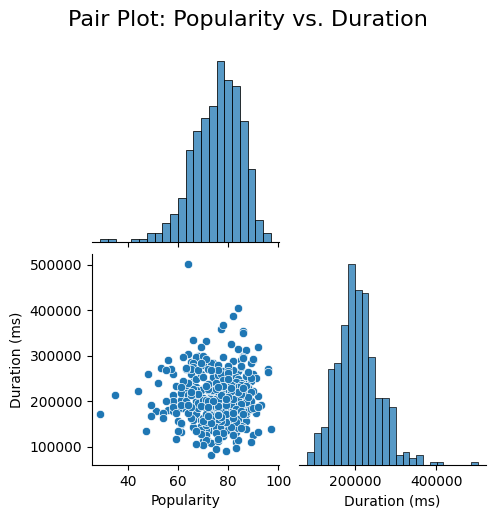

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Create a pair plot to visualize relationships between numerical variables
sns.pairplot(spotify_data_cleaned[['Popularity', 'Duration (ms)']].dropna(), diag_kind="hist", corner=True)
plt.suptitle('Pair Plot: Popularity vs. Duration', y=1.02, fontsize=16)
plt.show()

###9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

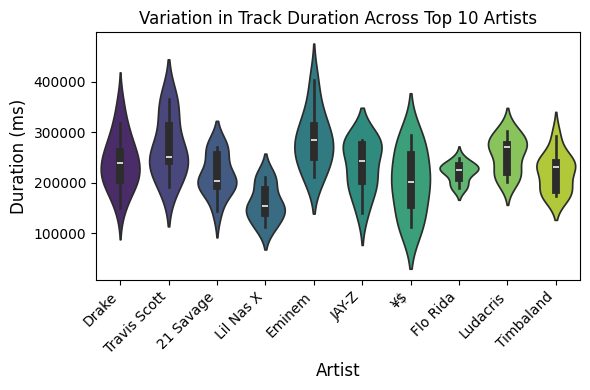

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Select the top 10 artists with the most tracks to make the plot more readable
top_10_artists_duration = spotify_data_cleaned['Artist'].value_counts().head(10).index

# Filter the dataset for these top 10 artists
filtered_data_duration = spotify_data_cleaned[spotify_data_cleaned['Artist'].isin(top_10_artists_duration)]

# Create a violin plot to visualize the variation in track duration across the top 10 artists
plt.figure(figsize=(6, 4))
sns.violinplot(x='Artist', y='Duration (ms)', hue = 'Artist', data=filtered_data_duration, dodge=False, legend=False, palette='viridis')
plt.title('Variation in Track Duration Across Top 10 Artists', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

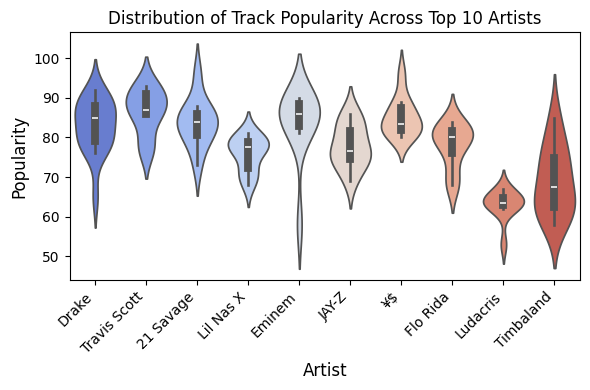

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
file_path = '/content/.config/spotify.csv'
spotify_data = pd.read_csv('/content/.config/spotify.csv')

# Select the top 10 artists with the most tracks to make the plot more readable
top_10_artists_duration = spotify_data_cleaned['Artist'].value_counts().head(10).index

# Filter the dataset for these top 10 artists
filtered_data_duration = spotify_data_cleaned[spotify_data_cleaned['Artist'].isin(top_10_artists_duration)]

# Create a violin plot to visualize the distribution of track popularity across the top 10 artists
plt.figure(figsize=(6, 4))
sns.violinplot(x='Artist', y='Popularity', hue = 'Artist', data=filtered_data_duration, dodge=False, legend=False, palette='coolwarm')
plt.title('Distribution of Track Popularity Across Top 10 Artists', fontsize=12)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
